# Qiskit Visualizations

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

## Plot Histogram

To visualize the data from a quantum circuit run on a real device or `qasm_simulator` we have made a simple function
```
plot_histogram(data)
```
As an example, take 2-qubit Bell state

In [2]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0, 1], [0, 1])

# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell.compose(meas)
result = backend.run(transpile(circ, backend), shots=10000).result()
counts = result.get_counts(circ)
print(counts)

{'00': 5040, '11': 4960}


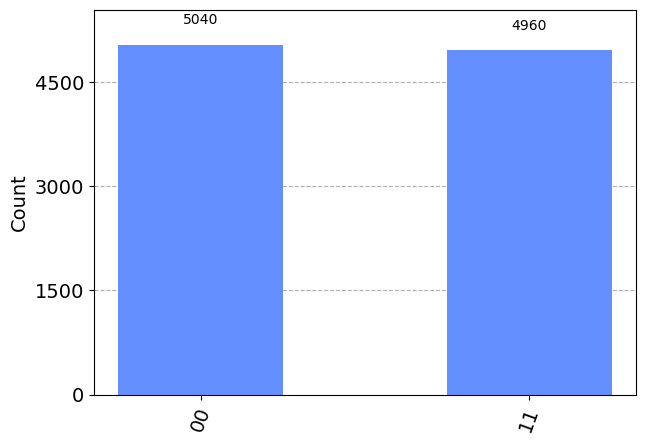

In [3]:
plot_histogram(counts)

## Options when plotting a histogram

The `plot_histogram` allows a few options to adjust the output graph
1. `legend`: `List[str]` kwarg, used to provide a label for each execution
2. `sort`: `'asc' | 'desc'` kwarg, used to order each bar in the histogram
3. `number_to_keep`: `int` kwarg, used to determine the number of terms to show, keeping the rest grouped in a single bar called `rest`
4. `color`: `str | List[str]` kwarg, determines one or more colors to use for bars of each execution
5. `bar_labels`: `bool` kwarg, determins whether labels are printed above the bars or not
6. `figsize`: `Tuple[int, int]` kwarg, determines the output size

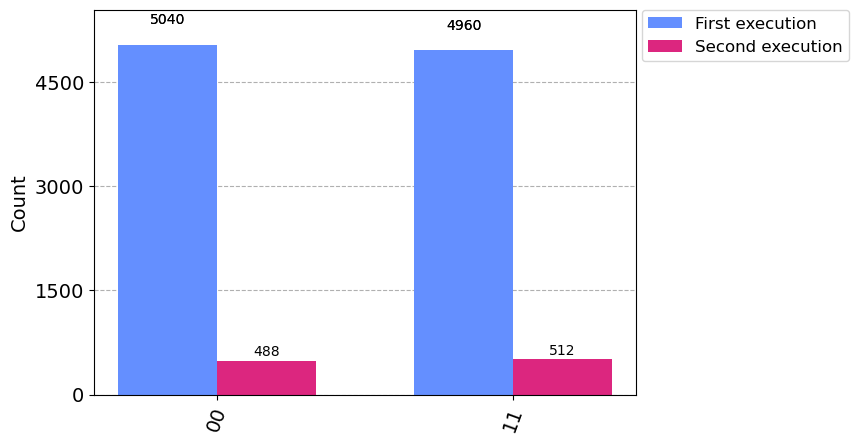

In [4]:
# Execute 2-qubit Bell state again
second_result = backend.run(transpile(circ, backend), shots=1000).result()
second_counts = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

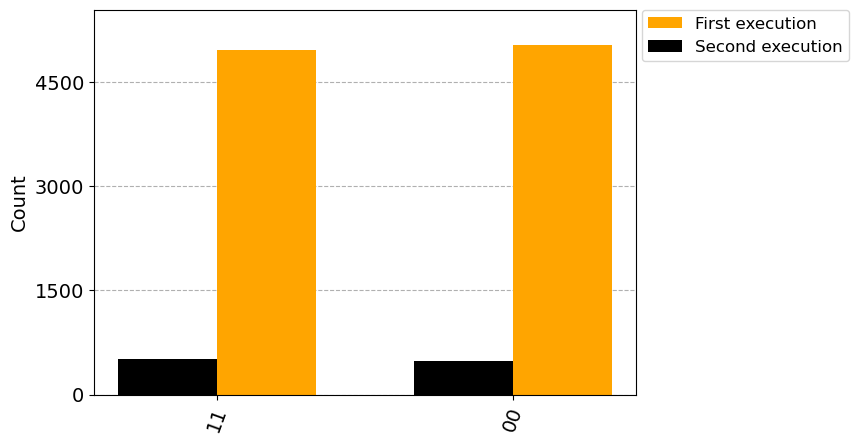

In [5]:
plot_histogram([counts, second_counts], legend=legend, sort='desc', color=['orange', 'black'], bar_labels=False)

## Using the output from plot_histogram(...)

When using the `plot_histogram(...)` function, it returns a `matplotlib.Figure` for the rendered visualization.

Jupyter notebooks understand this return type and render it for us, but it won't work the same outside of Jupyter.

However, the `matplotlib.Figure` class natively has methods to both display and save the visualization.
- `.show()` to open the image in a new window
- `.savefig('out.png')` to save the figure to `out.jpg`

## Plot State

How do we see the state of a quantum computer?

- for debugging
- state can be either from simulation or state tomography
- output is the visualization of a quantum state
- can be resource-intensive; recommended to view the state of small quantum systems

A quantum state is either:
- a hermitian density matrix $\rho$
- a state vector $| \psi \rangle \in \mathbb{C}^{2n}$ 
- a density matrix $\rho$ and a state vector $| \psi \rangle$ are related:
$$
\forall | \psi \rangle \in \mathbb{C}^{2n} \ \ \exists \rho \in \mathbb{C}^{2n \times 2n}: \rho =  | \psi \rangle \langle \psi |
$$
- $\rho$ is more general as it can represent mixed state (positive sum of state vectors)
$$
\rho = \sum_{k} p_k | \psi_k \rangle \langle \psi_k |
$$


There are several functions for generating different types of quantum state visualization
- `plot_state_city(quantum_state)`: The standard view for quantum states where the `\mathbf{Re}` and `\mathbf{Im}` parts of the density matrix are plotted like a city
- `plot_state_qsphere(quantum_state)`: The Qiskit unique view of a quantum state where the amplitude and phase of the state vector are plotted in a spherical ball.
    - The amplitude is the thickness of the arrow
    - The phase is the color
    - For mixed states it will show different `qsphere` for each component
- `plot_state_paulivec(quantum_state)`: The representation of the density matrix using Pauli operators as the basis $ \rho = \sum_{j=0}^{d^2-1} p_j P_j / d$ 
- `plot_state_hinton(quantum_state)`: Same as `city` but where the size of the element represents the value of the matrix element
- `plot_state_multivector(quantum_state)`: The projection of the quantum state onto the single qubit space and plotting on a bloch sphere
- `


In [6]:
from qiskit.visualization import (
    plot_state_city, plot_state_qsphere, plot_state_paulivec,
    plot_state_hinton, plot_bloch_multivector
)

In [7]:
# execute the quantum circuit
backend = BasicAer.get_backend('statevector_simulator')
result = backend.run(transpile(bell, backend)).result()
psi = result.get_statevector(bell)

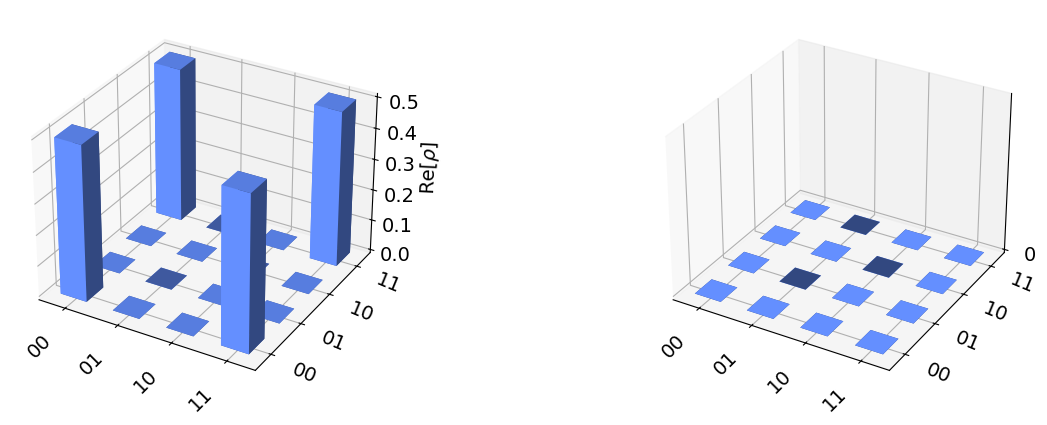

In [8]:
plot_state_city(psi)

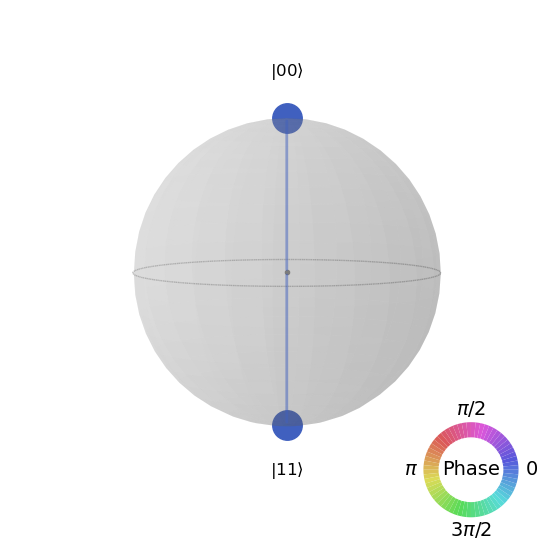

In [11]:
plot_state_qsphere(psi)

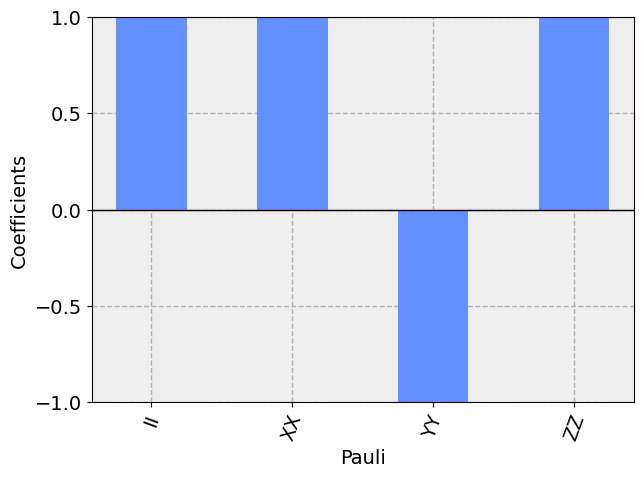

In [12]:
plot_state_paulivec(psi)

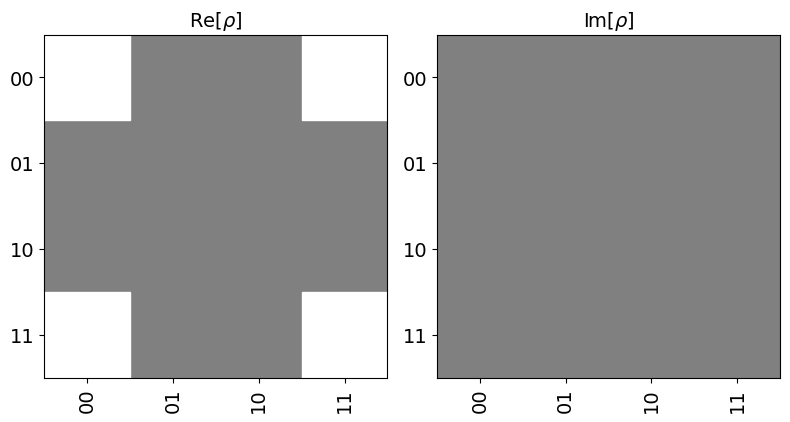

In [10]:
plot_state_hinton(psi)

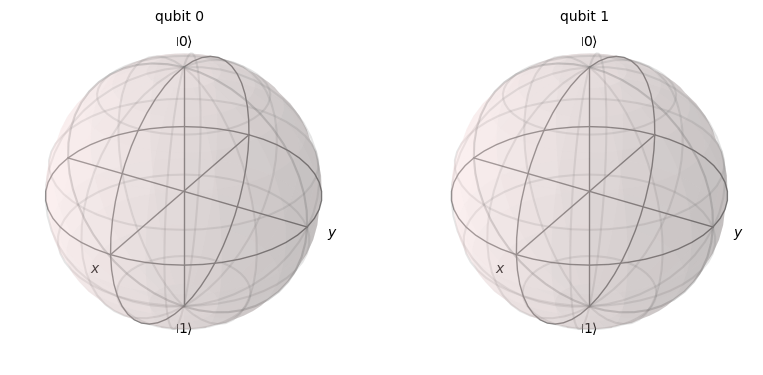

In [14]:
plot_bloch_multivector(psi)
# here we see that there is no info about the quantum state in the single qubit space as all vectors are zero

## Options when using state plotting functions

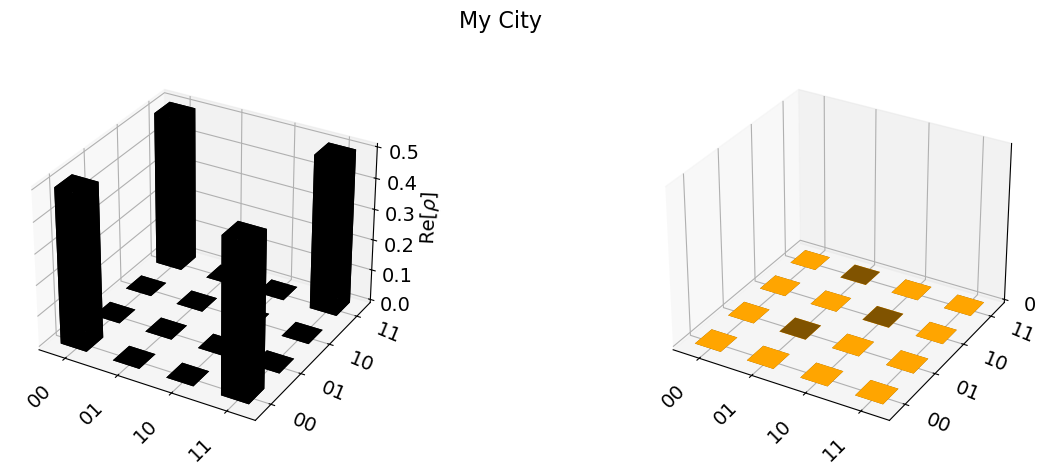

In [15]:
# title: str - a string that represents the plot title
# figsize: Tuple[int, int] - figure size in inches (width, height)
# color: List[str] - a list of len=2 giving colors for re/im components of matrix elements
plot_state_city(psi, title='My City', color=['black', 'orange'])

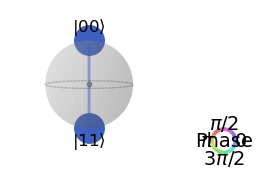

In [16]:
# figsize: Tuple[int, int] - figure size in inches (width, height)
plot_state_qsphere(psi, (5, 2))

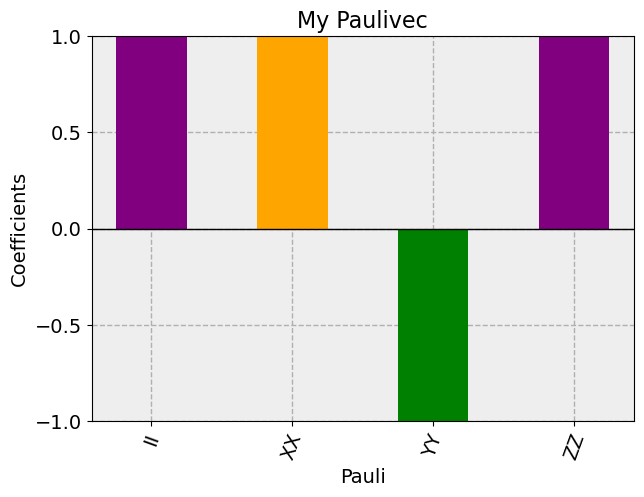

In [20]:
# title: str - a string that represents the plot title
# figsize: Tuple[int, int] - figure size in inches (width, height)
# color: List[str] - color of expectation value bars
plot_state_paulivec(psi, title='My Paulivec', color=['purple', 'orange', 'green'])

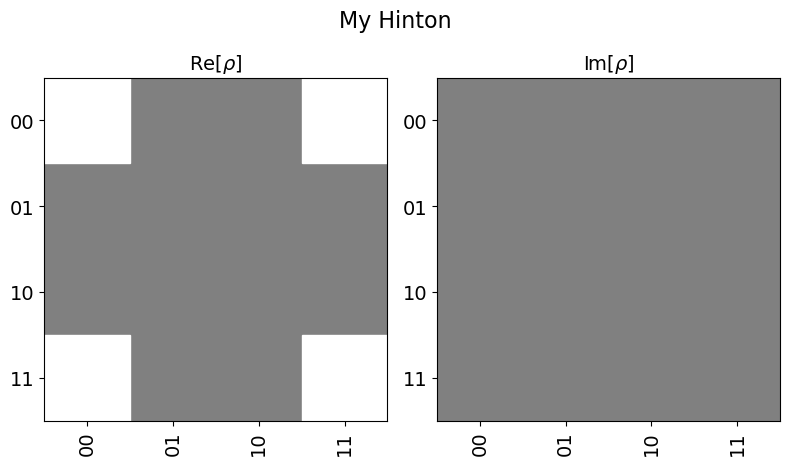

In [21]:
# title: str - a string that represents the plot title
# figsize: Tuple[int, int] - figure size in inches (width, height)
plot_state_hinton(psi, title='My Hinton')

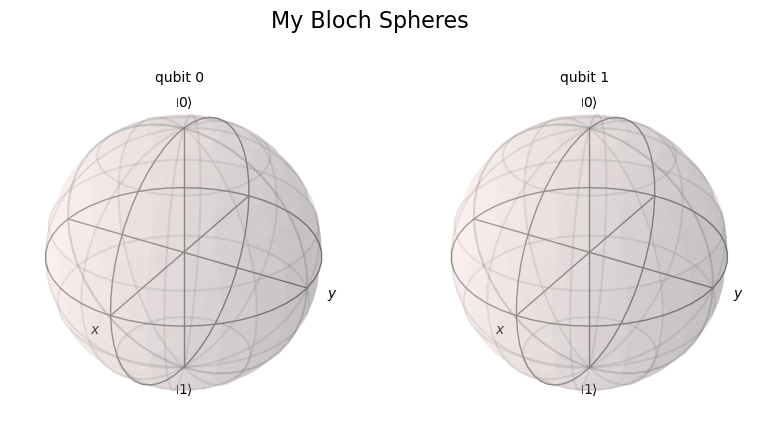

In [22]:
# title: str - a string that represents the plot title
# figsize: Tuple[int, int] - figure size in inches (width, height)
plot_bloch_multivector(psi, title='My Bloch Spheres')

## Using the output from state plotting functions

- `.show()`
- `.savefig('out.png')`

## Plot Bloch Vector

Using the Bloch vector is a standard way of plotting a quantum system

This only works for a single qubit and takes Bloch vector as input

The Bloch vector is defined as
$$
[x = Tr[X\rho], y = Tr[Y\rho], z = Tr[Z\rho]]
$$
where $X, Y, Z$ are the Pauli operators for a single qubit and $\rho$ is the density matrix

In [23]:
from qiskit.visualization import plot_bloch_vector

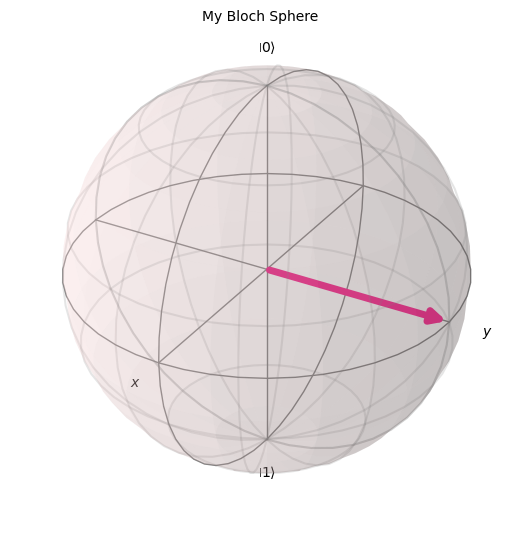

In [25]:
# title: str - a string that represents the plot title
# figsize: Tuple[int, int] - figure size in inches (width, height)
plot_bloch_vector([0, 1, 0], title='My Bloch Sphere')